Star Schema Output (Denormalized Table):


ride_id,customer_id,driver_id,location_id,time_id,fare,name_x,type,profile_link_x,name_y,vehicle,profile_link_y,city,state,date,hour
1,101,201,301,401,250,kartik,Regular,"http://example.com/customers/101"" target=""_blank"">http://example.com/customers/101",aryan,Sedan,"http://example.com/drivers/201"" target=""_blank"">http://example.com/drivers/201",Mumbai,MH,2024-04-10,10
2,102,202,302,402,340,chimtu,Premium,"http://example.com/customers/102"" target=""_blank"">http://example.com/customers/102",sarthak,Hatchback,"http://example.com/drivers/202"" target=""_blank"">http://example.com/drivers/202",Delhi,DL,2024-04-11,15



Snowflake Schema Output (Normalized Tables):

Fact Table: rides


,ride_id,customer_id,driver_id,location_id,time_id,fare
0,1,101,201,301,401,250
1,2,102,202,302,402,340



Dimension Table: customers


customer_id,name,type,profile_link
101,kartik,Regular,http://example.com/customers/101
102,chimtu,Premium,http://example.com/customers/102



Dimension Table: drivers


driver_id,name,vehicle,profile_link
201,aryan,Sedan,http://example.com/drivers/201
202,sarthak,Hatchback,http://example.com/drivers/202



Dimension Table: locations


,location_id,city_id
0,301,1
1,302,2



Dimension Table: cities


,city_id,city_name,state
0,1,Mumbai,MH
1,2,Delhi,DL



Dimension Table: time


,time_id,date,hour
0,401,2024-04-10,10
1,402,2024-04-11,15


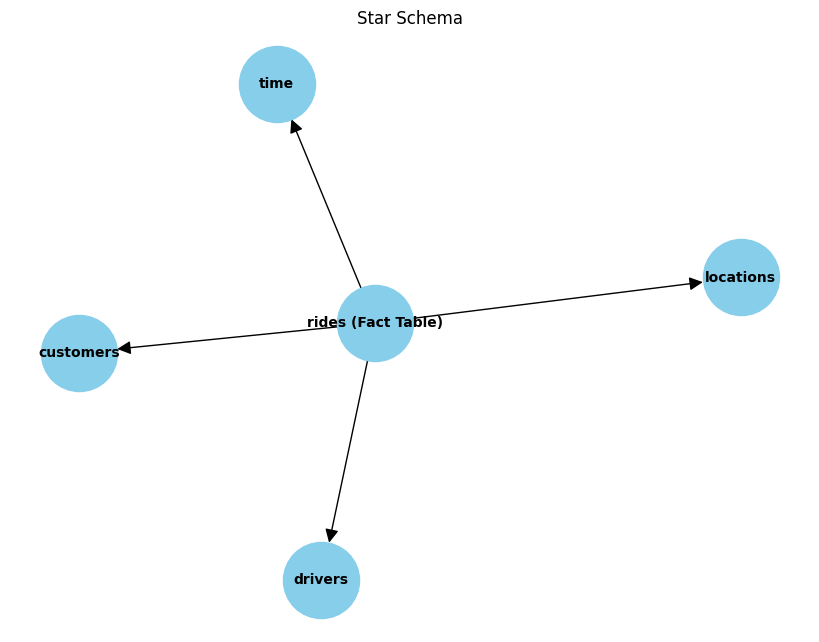

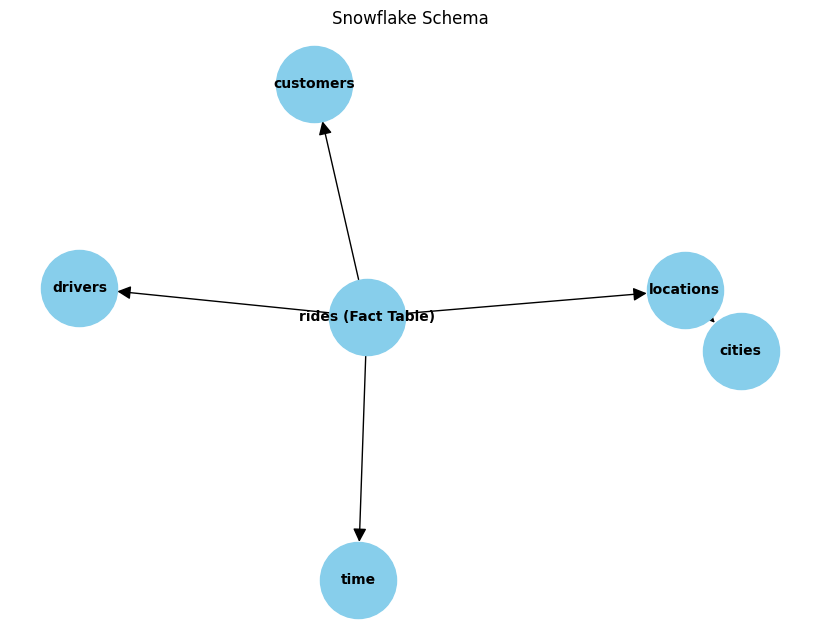

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# DataFrames
rides = pd.DataFrame({
    'ride_id': [1, 2],
    'customer_id': [101, 102],
    'driver_id': [201, 202],
    'location_id': [301, 302],
    'time_id': [401, 402],
    'fare': [250, 340]
})

customers = pd.DataFrame({
    'customer_id': [101, 102],
    'name': ['kartik', 'chimtu'],
    'type': ['Regular', 'Premium'],
    'profile_link': ['http://example.com/customers/101', 'http://example.com/customers/102']
})

drivers = pd.DataFrame({
    'driver_id': [201, 202],
    'name': ['aryan', 'sarthak'],
    'vehicle': ['Sedan', 'Hatchback'],
    'profile_link': ['http://example.com/drivers/201', 'http://example.com/drivers/202']
})

locations = pd.DataFrame({
    'location_id': [301, 302],
    'city': ['Mumbai', 'Delhi'],
    'state': ['MH', 'DL']
})

time = pd.DataFrame({
    'time_id': [401, 402],
    'date': ['2024-04-10', '2024-04-11'],
    'hour': [10, 15]
})

cities = pd.DataFrame({
    'city_id': [1, 2],
    'city_name': ['Mumbai', 'Delhi'],
    'state': ['MH', 'DL']
})

locations_snowflake = pd.DataFrame({
    'location_id': [301, 302],
    'city_id': [1, 2]
})

def make_clickable(val):
    return f'<a href="{val}" target="_blank">{val}</a>'


customers['profile_link'] = customers['profile_link'].apply(make_clickable)
drivers['profile_link'] = drivers['profile_link'].apply(make_clickable)


star_schema = rides \
    .merge(customers, on='customer_id') \
    .merge(drivers, on='driver_id') \
    .merge(locations, on='location_id') \
    .merge(time, on='time_id')

star_schema['profile_link_x'] = star_schema['profile_link_x'].apply(make_clickable)
star_schema['profile_link_y'] = star_schema['profile_link_y'].apply(make_clickable)

print("Star Schema Output (Denormalized Table):")
display(HTML(star_schema.to_html(escape=False, index=False)))


print("\nSnowflake Schema Output (Normalized Tables):")

print("\nFact Table: rides")
display(rides)

print("\nDimension Table: customers")
display(HTML(customers.to_html(escape=False, index=False)))

print("\nDimension Table: drivers")
display(HTML(drivers.to_html(escape=False, index=False)))

print("\nDimension Table: locations")
display(locations_snowflake)

print("\nDimension Table: cities")
display(cities)

print("\nDimension Table: time")
display(time)


def draw_graph(graph, title):
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
    plt.title(title)
    plt.show()


star_graph = nx.DiGraph()
star_graph.add_node('rides (Fact Table)')
star_graph.add_nodes_from(['customers', 'drivers', 'locations', 'time'])
star_graph.add_edges_from([
    ('rides (Fact Table)', 'customers'),
    ('rides (Fact Table)', 'drivers'),
    ('rides (Fact Table)', 'locations'),
    ('rides (Fact Table)', 'time')
])

draw_graph(star_graph, "Star Schema")


snowflake_graph = nx.DiGraph()
snowflake_graph.add_node('rides (Fact Table)')
snowflake_graph.add_nodes_from(['customers', 'drivers', 'locations', 'cities', 'time'])
snowflake_graph.add_edges_from([
    ('rides (Fact Table)', 'customers'),
    ('rides (Fact Table)', 'drivers'),
    ('rides (Fact Table)', 'locations'),
    ('rides (Fact Table)', 'time'),
    ('locations', 'cities')
])

draw_graph(snowflake_graph, "Snowflake Schema")